# precision and recall

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import itertools

import pandas as pd
import upath
import extras

In [3]:
import logging

# set up handler
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s %(levelname)s %(message)s")
handler.setFormatter(formatter)
logging.getLogger().handlers = [handler]

# set up logger
logger = logging.getLogger(__name__)

# set levels
logging.getLogger().setLevel("INFO")
logger.setLevel("DEBUG")
logging.getLogger("extras").setLevel("INFO")

In [4]:
path_root = upath.UPath("gs://liulab/differential_composition_and_expression/20230317_06h00m45s")
# print(extras.get_parquet_paths(path_root))
# !gsutil ls "{path_root}/*"

In [5]:
df_gene_stats = extras.load_gene_stats(path_root)

In [7]:
df_gene_stats.groupby(["origin", "run_id"]).size()

origin                run_id
bulk                  00        899528
                      01        562205
malignant_cibersortx  00        899528
                      01        562205
dtype: int64

In [9]:
df = df_gene_stats.xs("malignant_cibersortx", level="origin", drop_level=False).xs(
    "00", level="run_id", drop_level=False
)
df_prc = extras.calculate_precision_and_recall(df)
df_prc

precision  recall    thresholds
malignant_means log2_fc run_id                                      
0.55,0.85       -1.50   00     0      0.006225    1.00  8.991869e-17
                               1      0.006164    0.99  1.388347e-15
                               2      0.006102    0.98  5.844879e-15
                               3      0.006040    0.97  1.637897e-14
                               4      0.005978    0.96  7.641664e-14
...                                        ...     ...           ...
0.85,0.55       1.50    00     6519   0.000000    0.00  9.972495e-01
                               6520   0.000000    0.00  9.972498e-01
                               6521   0.000000    0.00  9.972498e-01
                               6522   0.000000    0.00  1.000000e+00
                               6523   1.000000    0.00           inf

[316232 rows x 3 columns]

In [10]:
fig = extras.plot_precision_recall_curve(df_prc)

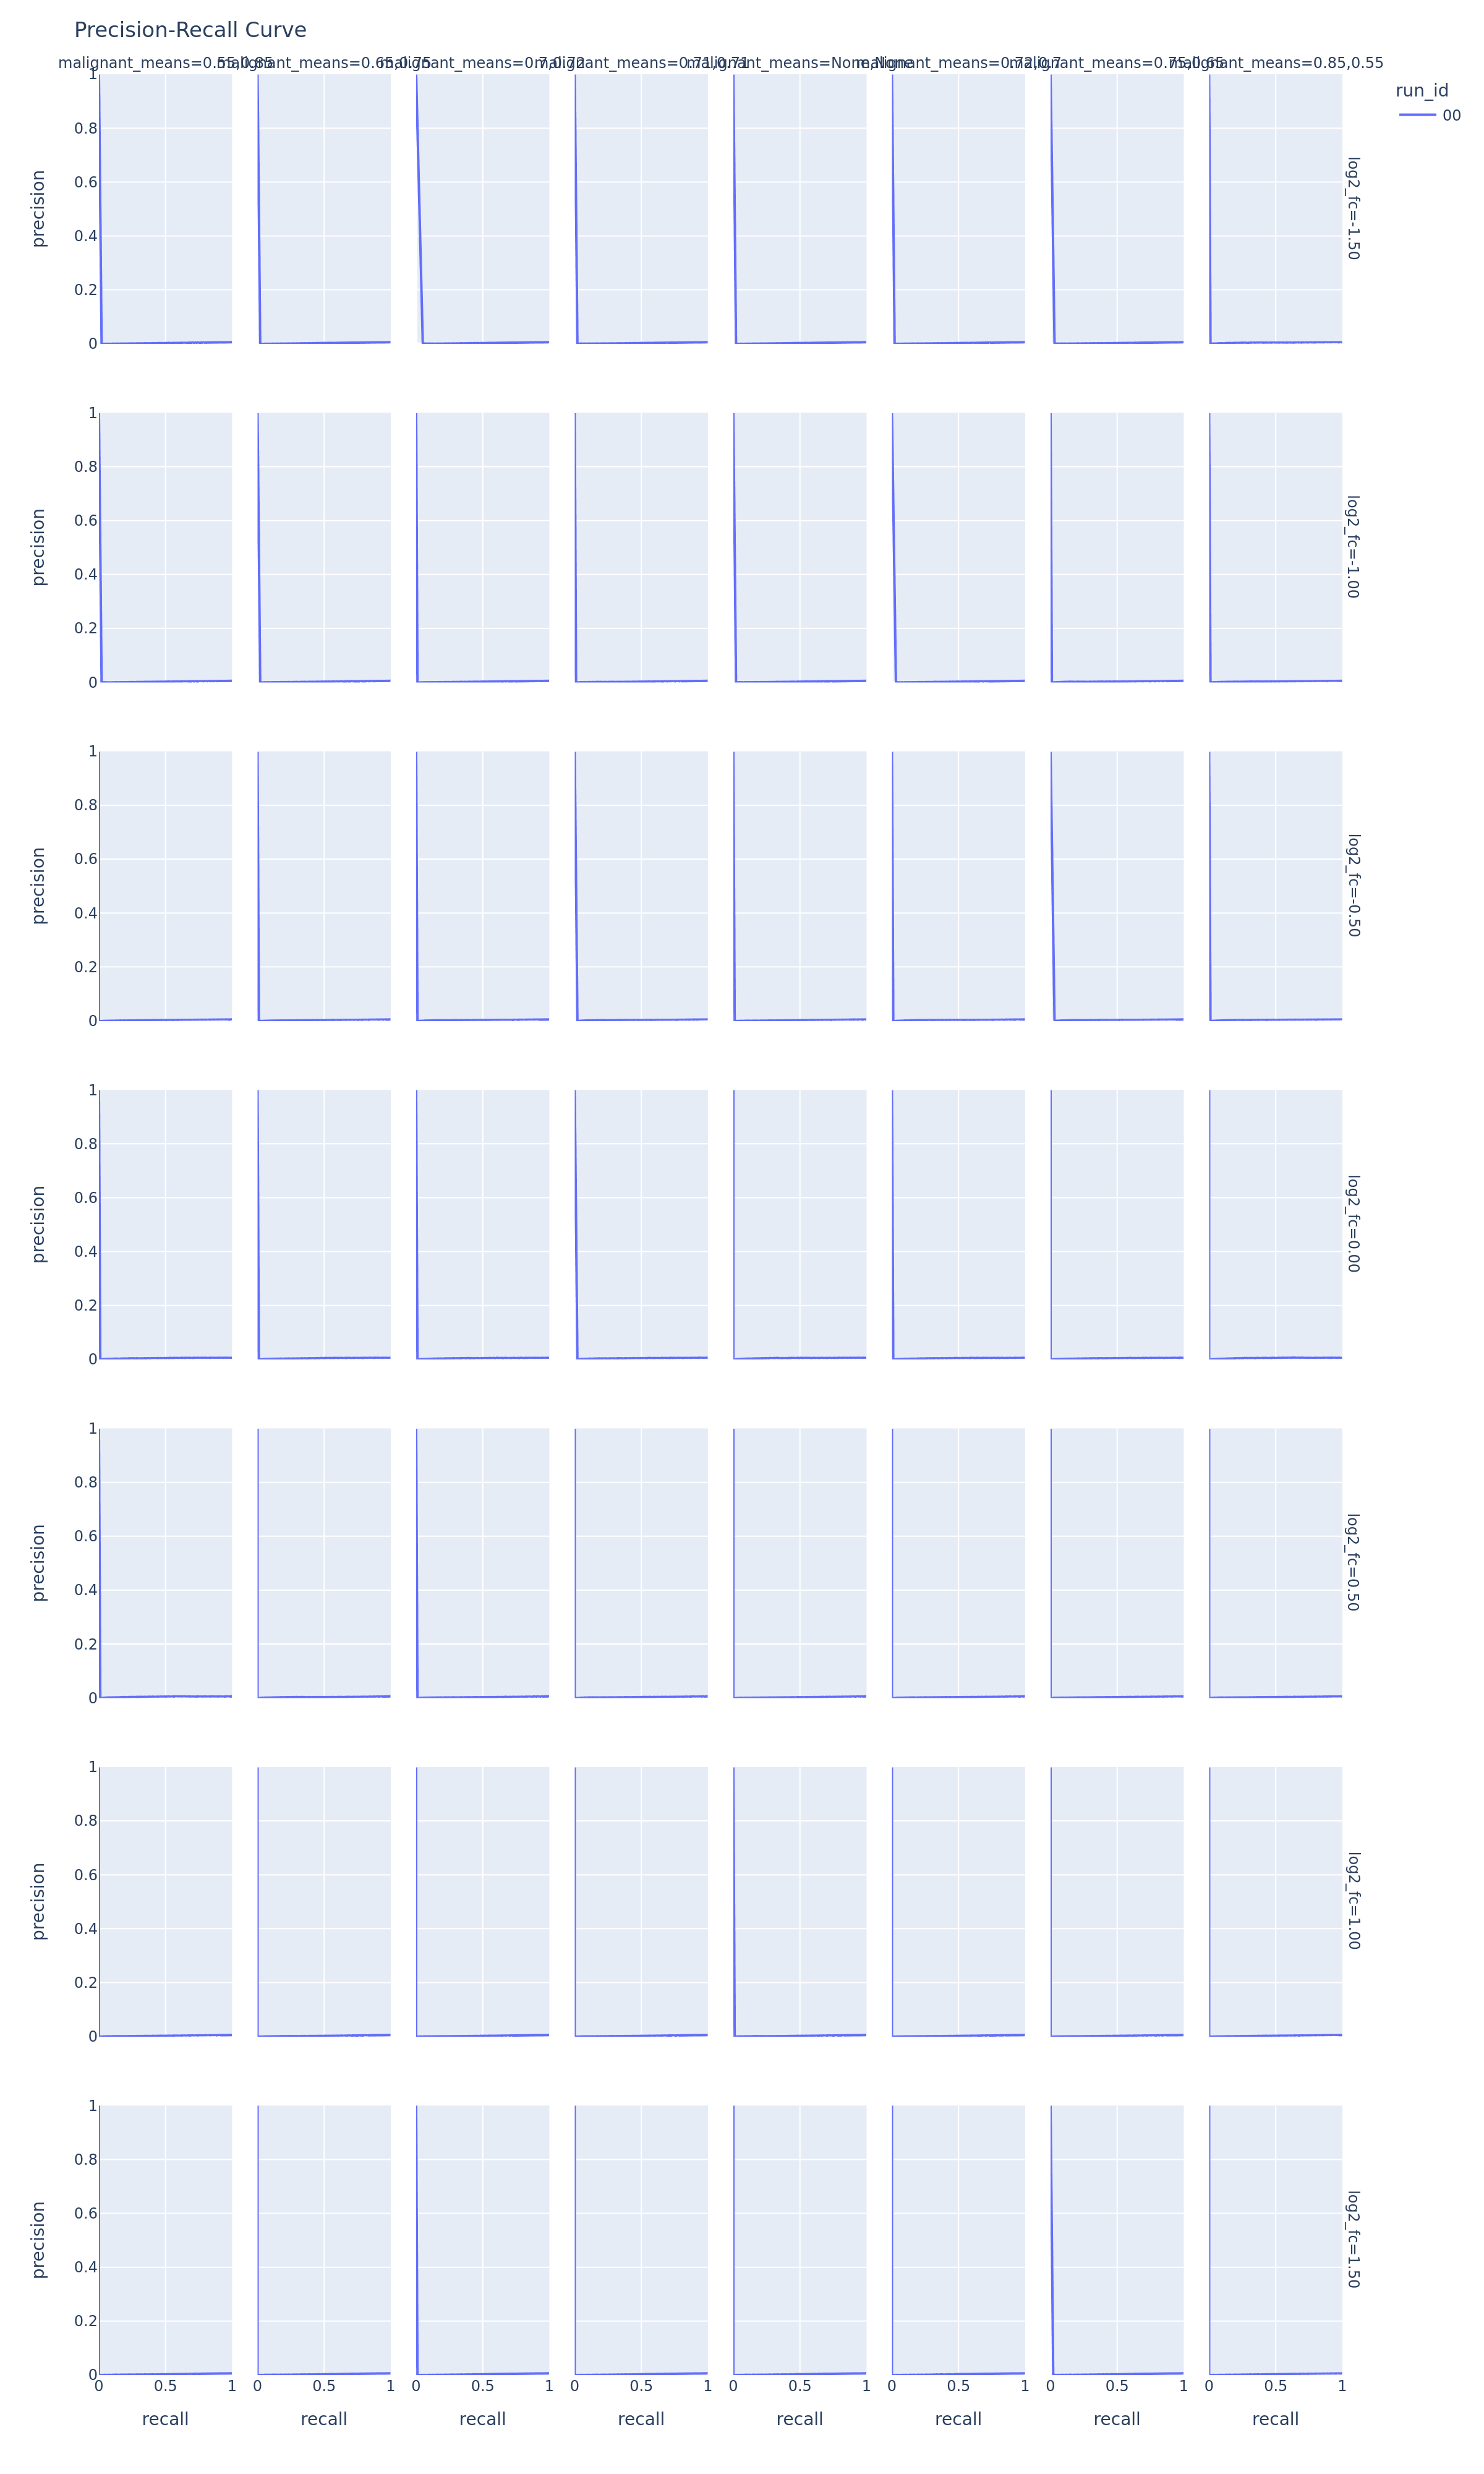

In [11]:
fig.update_layout(width=1200, height=2000)
fig.show(renderer="png", scale=2)